In [1]:
from caller_2 import *
import random

In [123]:
# Basic dataframe Manipulation for 2022 Data extraction that will be fed in to model 

df = pd.read_csv('citywise/Nizamabad.csv')

df_lat = df[df['Date'] > '2021-10-00']
df_lat = df_lat[df_lat['Date'] < '2022-00-00']
df_lat = df_lat[df_lat['Mandal'] == str(df_lat['Mandal'].unique()[-1])] .set_index('Date')
df_lat = df_lat[['Max Temp (°C)', 'Min Temp (°C)']]

df = df[df['Date'] > '2022-01-00']
df = df[df['Mandal'] == str(df['Mandal'].unique()[-1])] .set_index('Date')
df = df[['Max Temp (°C)', 'Min Temp (°C)']]

gf = pd.concat([df,df_lat]).iloc[109:,:]

In [124]:
# model loaded from local Directory 
from tensorflow.keras.models import load_model 
model = load_model('models/nizam/local')

In [125]:
# Array Typcasting

temp_max = array(gf['Max Temp (°C)']).reshape(1,256)
temp_min = array(gf['Min Temp (°C)']).reshape(1,256)

In [126]:
# model has now predicted and the array outputs have now been saved

hg = pd.DataFrame()
ans = model.predict([temp_max,temp_min])
hg['temp_max'] = array(ans[0][0])
hg['temp_min'] = array(ans[1][0])
hg = hg.rolling(7).mean()[7:]
hg.to_csv('year_con1d_nizam.csv')

1/1 [==============================] - 0s 285ms/step


In [133]:
# Implementation of Departure from normal for heatwave statistical classification

temp = pd.DataFrame()
temp_2 = pd.DataFrame()
temp_2['temp_max'] = hg['temp_max']
temp['max_rol'] = temp_2['temp_max'].rolling(7).mean()[7:]
temp['meaner'] = 0
temp['HW'] = 0
temp['sev'] = 0
temp['norm'] = 0


for i in range(10,len(temp)):
    wind_10 = temp[i-10:i].values.mean()
    todays_dip = abs(float(wind_10-temp.iloc[i,0]))
    # print(todays_dip)
    temp['meaner'].iloc[i] = todays_dip 


for i in range(10,len(temp)):
    wind_10 = temp['meaner'][i-10:i].values.mean()
    todays_dip = abs(float(wind_10-temp['meaner'].iloc[i]))

    if (todays_dip > 1.0) and (todays_dip < 4.0) and i<200 and i>45:
        temp['HW'].iloc[i] = temp.iloc[i,0]
    elif (todays_dip > 4.0) and i<200 and i>45:
        temp['sev'].iloc[i] = temp.iloc[i,0]
    else :
        temp['norm'].iloc[i] = temp.iloc[i,0]

C:\Users\AIDL Lab\AppData\Local\Temp\ipykernel_11992\3256488765.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['meaner'].iloc[i] = todays_dip
C:\Users\AIDL Lab\AppData\Local\Temp\ipykernel_11992\3256488765.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['norm'].iloc[i] = temp.iloc[i,0]
C:\Users\AIDL Lab\AppData\Local\Temp\ipykernel_11992\3256488765.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['HW'].ilo

In [134]:
# Heat wave values and index stored for display in the website

ind,hW = [],[]
for i in range(len(temp)):
    if temp['HW'].iloc[i] != 0.0 :
        ind.append( i-7)
        hW.append(temp['HW'].iloc[i])
    elif temp['sev'].iloc[i] != 0.0 :
        ind.append( i-7)
        hW.append(temp['sev'].iloc[i])

ty = pd.DataFrame()
ty['cord'] = ind
ty['val'] = hW
ty.to_csv('high_Con1d_nizam.csv')


(20.0, 48.0)

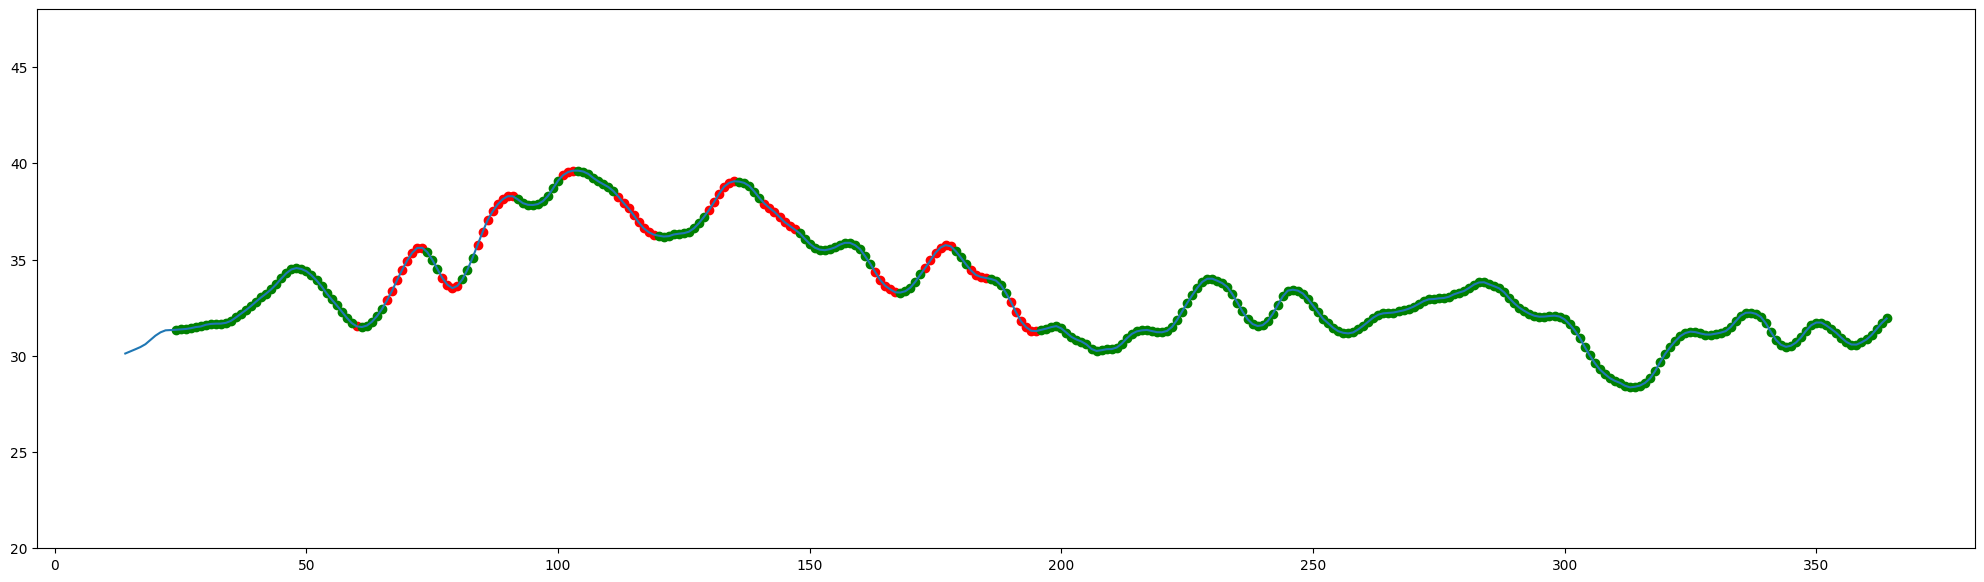

In [135]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(7)

plt.scatter(temp.index, temp['HW'], color = 'red')
plt.scatter(temp.index, temp['sev'], color = 'red')
plt.scatter(temp.index, temp['norm'], color = 'green')
plt.plot(temp.iloc[:,0])

plt.ylim(20,48)